In [1]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn import preprocessing
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor, OLSInfluence
from sklearn.model_selection import train_test_split
from sklearn import linear_model as lm

%matplotlib inline

In [2]:
df=pd.read_csv("Cirrhosis Prediction Dataset.csv")

In [3]:
df.head

<bound method NDFrame.head of       ID  N_Days Status             Drug    Age Sex Ascites Hepatomegaly  \
0      1     400      D  D-penicillamine  21464   F       Y            Y   
1      2    4500      C  D-penicillamine  20617   F       N            Y   
2      3    1012      D  D-penicillamine  25594   M       N            N   
3      4    1925      D  D-penicillamine  19994   F       N            Y   
4      5    1504     CL          Placebo  13918   F       N            Y   
..   ...     ...    ...              ...    ...  ..     ...          ...   
413  414     681      D              NaN  24472   F     NaN          NaN   
414  415    1103      C              NaN  14245   F     NaN          NaN   
415  416    1055      C              NaN  20819   F     NaN          NaN   
416  417     691      C              NaN  21185   F     NaN          NaN   
417  418     976      C              NaN  19358   F     NaN          NaN   

    Spiders Edema  Bilirubin  Cholesterol  Albumin  Coppe

In [4]:
# Show dataset column names
column_names = df.columns
print("Column Names:")
print(column_names)

# Show the number of rows and columns in the dataset
num_rows, num_columns = df.shape
print("Number of Rows:", num_rows)
print("Number of Columns:", num_columns)

# Show column names and data types
column_data_types = df.dtypes
print("Column Data Types:")
print(column_data_types)

# Show the number of null values in each column
null_counts = df.isnull().sum()
print("Null Counts:")
print(null_counts)

Column Names:
Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')
Number of Rows: 418
Number of Columns: 20
Column Data Types:
ID                 int64
N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object
Null Counts:
ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Asc

In [5]:
# Find the number of rows that contain null values
num_rows_with_null = df.isnull().any(axis="columns").sum()
print("Number of Rows with Null Values:", num_rows_with_null)

Number of Rows with Null Values: 142


In [6]:
142/num_rows

0.3397129186602871

In [7]:
# Fill null values in float columns with the mean of each column
float_columns = df.select_dtypes(include=['float'])
df[float_columns.columns] = df[float_columns.columns].fillna(df[float_columns.columns].mean())

In [8]:
df[float_columns.columns].isnull().sum()

Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [9]:
# Fill null values in object columns with the mode of each column
object_columns = df.select_dtypes(include=['object'])
df[object_columns.columns] = df[object_columns.columns].fillna(df[object_columns.columns].mode().iloc[0])

In [10]:
df[object_columns.columns].isnull().sum()

Status          0
Drug            0
Sex             0
Ascites         0
Hepatomegaly    0
Spiders         0
Edema           0
dtype: int64

In [11]:
int_columns = df.select_dtypes(include=["int"])
df[int_columns.columns] =df[int_columns.columns].fillna(df[int_columns.columns].mean())

In [12]:
df[int_columns.columns].isnull().sum()

ID        0
N_Days    0
Age       0
dtype: int64

In [13]:
# Assemble the resulting subset dataframes into a new dataframe
df1 = pd.concat([df[int_columns.columns],df[object_columns.columns],df[float_columns.columns]], axis=1)



In [14]:
df[object_columns.columns]

,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema
0,D,D-penicillamine,F,Y,Y,Y,Y
1,C,D-penicillamine,F,N,Y,Y,N
2,D,D-penicillamine,M,N,N,N,S
3,D,D-penicillamine,F,N,Y,Y,S
4,CL,Placebo,F,N,Y,Y,N
...,...,...,...,...,...,...,...
413,D,D-penicillamine,F,N,Y,N,N
414,C,D-penicillamine,F,N,Y,N,N
415,C,D-penicillamine,F,N,Y,N,N
416,C,D-penicillamine,F,N,Y,N,N


In [15]:
df = df.drop_duplicates()

In [16]:
# Print unique values for each categorical column
for column in df[object_columns.columns]:
    unique_values = df[column].unique()
    no_unique = df[column].nunique()
    print("Column:", column)
    print(no_unique)
    print("Unique Values:")
    print(unique_values)
    print()

Column: Status
3
Unique Values:
['D' 'C' 'CL']

Column: Drug
2
Unique Values:
['D-penicillamine' 'Placebo']

Column: Sex
2
Unique Values:
['F' 'M']

Column: Ascites
2
Unique Values:
['Y' 'N']

Column: Hepatomegaly
2
Unique Values:
['Y' 'N']

Column: Spiders
2
Unique Values:
['Y' 'N']

Column: Edema
3
Unique Values:
['Y' 'N' 'S']



In [17]:
categorical_variables = []
for column in df1:
    if df1[column].nunique() >= 2 and df1[column].dtype == 'object':
        categorical_variables.append(column)

In [18]:
categorical_variables

['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

In [19]:
dfp = pd.get_dummies(df1, columns=categorical_variables)

In [20]:
print(dfp.columns)

Index(['ID', 'N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'Status_C', 'Status_CL', 'Status_D', 'Drug_D-penicillamine',
       'Drug_Placebo', 'Sex_F', 'Sex_M', 'Ascites_N', 'Ascites_Y',
       'Hepatomegaly_N', 'Hepatomegaly_Y', 'Spiders_N', 'Spiders_Y', 'Edema_N',
       'Edema_S', 'Edema_Y'],
      dtype='object')


In [21]:
# Convert non-numeric values to NaN
#dfp = dfp.apply(pd.to_numeric, errors='coerce')

# Calculate the correlation matrix
correlation_matrix = dfp.corr()
dfp.corr()


,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,...,Sex_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y
ID,1.000000,-0.354305,0.037136,-0.062154,0.020507,-0.128924,-0.063529,-0.227543,-0.007801,-0.021199,...,-0.083855,0.182124,-0.182124,-0.299714,0.299714,0.289600,-0.289600,0.106538,0.013631,-0.199337
N_Days,-0.354305,1.000000,-0.125934,-0.403953,-0.114683,0.430829,-0.319775,0.131080,-0.198015,-0.126912,...,-0.007386,0.247090,-0.247090,0.287832,-0.287832,0.180715,-0.180715,0.271732,-0.135174,-0.264077
Age,0.037136,-0.125934,1.000000,0.002362,-0.130578,-0.182350,0.053617,-0.041326,-0.131087,0.018278,...,0.163341,-0.183588,0.183588,-0.111522,0.111522,0.078040,-0.078040,-0.199729,0.143887,0.130074
Bilirubin,-0.062154,-0.403953,0.002362,1.000000,0.337809,-0.314177,0.405228,0.103842,0.392107,0.371490,...,-0.027652,-0.334283,0.334283,-0.234372,0.234372,-0.247932,0.247932,-0.282617,0.117552,0.307779
Cholesterol,0.020507,-0.114683,-0.130578,0.337809,1.000000,-0.054572,0.123024,0.140112,0.337282,0.276828,...,-0.010084,0.053761,-0.053761,-0.117913,0.117913,-0.056697,0.056697,0.083162,-0.039550,-0.083435
Albumin,-0.128924,0.430829,-0.182350,-0.314177,-0.054572,1.000000,-0.225532,-0.086570,-0.187761,-0.080804,...,0.030351,0.315648,-0.315648,0.269351,-0.269351,0.162071,-0.162071,0.275728,-0.100594,-0.320538
Copper,-0.063529,-0.319775,0.053617,0.405228,0.123024,-0.225532,1.000000,0.187285,0.293547,0.272473,...,0.215897,-0.219907,0.219907,-0.209503,0.209503,-0.247826,0.247826,-0.188532,0.046792,0.250790
Alk_Phos,-0.227543,0.131080,-0.041326,0.103842,0.140112,-0.086570,0.187285,1.000000,0.112217,0.168702,...,0.028926,-0.010504,0.010504,-0.098959,0.098959,-0.036056,0.036056,-0.023943,0.019885,0.011802
SGOT,-0.007801,-0.198015,-0.131087,0.392107,0.337282,-0.187761,0.293547,0.112217,1.000000,0.119463,...,-0.003247,-0.091305,0.091305,-0.122119,0.122119,-0.124482,0.124482,-0.098898,0.015012,0.145263
Tryglicerides,-0.021199,-0.126912,0.018278,0.371490,0.276828,-0.080804,0.272473,0.168702,0.119463,1.000000,...,0.044573,-0.187699,0.187699,-0.136908,0.136908,-0.087401,0.087401,-0.094875,0.103141,0.011764


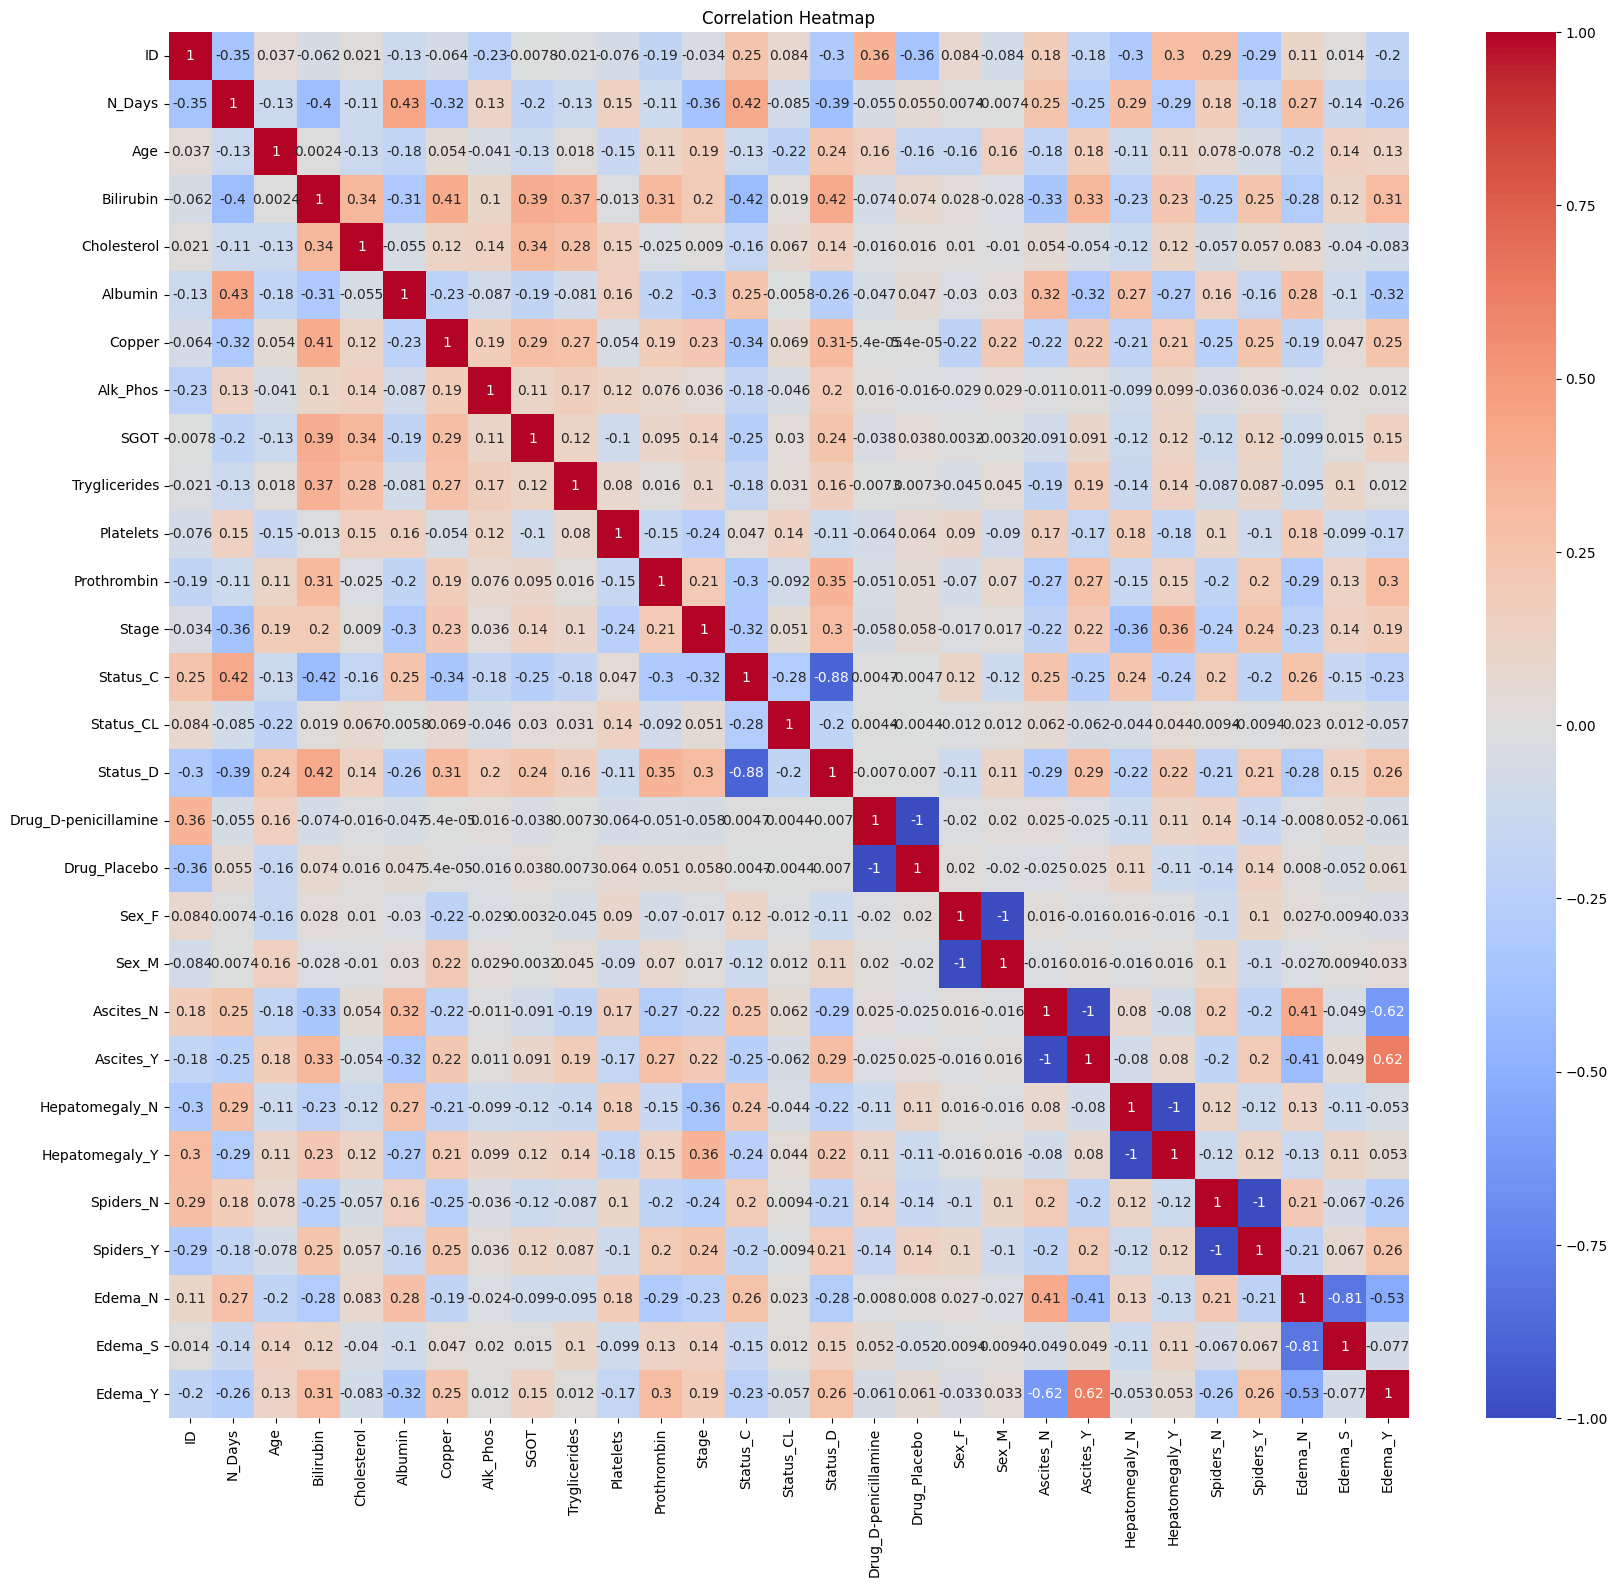

In [22]:
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [23]:
dfp = dfp.drop('ID', axis=1)
n=len(dfp.axes[1])

In [24]:
n=len(dfp.axes[1])
n

28

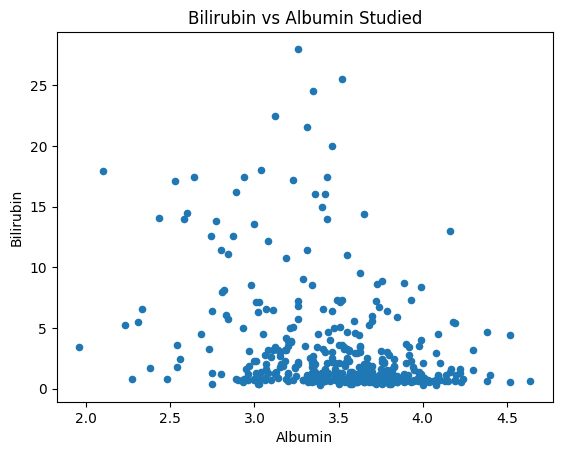

In [25]:
# Simple scatter plot
df.plot(kind='scatter', x='Albumin', y='Bilirubin', title='Bilirubin vs Albumin Studied')
plt.show()



In [27]:
X = dfp.drop('Stage', axis=1)
y = dfp['Stage']

y = y.astype(int)

#??????????????????????????????????convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)
#view transformed values
print(y_transformed)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Create an instance of the logistic regression model
model = LogisticRegression()
# Fit the model to the training data
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


[3 2 3 3 2 2 2 2 1 3 3 3 2 3 2 2 3 3 2 3 3 3 3 1 1 2 3 3 1 3 1 3 2 1 2 1 3
 3 3 3 3 3 1 2 1 2 2 2 3 3 1 0 3 3 2 1 2 0 2 2 0 3 2 2 0 2 2 2 2 1 3 2 0 3
 3 3 2 3 2 3 3 2 3 2 3 2 2 2 1 1 3 3 1 3 1 2 2 0 1 3 2 0 3 1 2 1 0 1 2 2 2
 3 3 2 2 2 3 2 2 2 3 2 3 3 3 3 1 3 2 2 3 2 3 1 1 1 1 2 3 2 1 1 3 2 2 2 1 2
 3 0 1 2 0 2 3 1 1 1 2 2 1 3 2 3 3 1 3 1 2 2 2 2 1 0 2 3 1 3 3 2 3 1 1 2 2
 2 2 3 2 1 3 3 3 1 3 3 1 1 2 2 3 1 1 2 2 0 3 3 1 1 2 2 2 2 2 2 3 0 2 1 3 2
 3 2 1 2 1 2 3 3 3 2 3 1 2 2 2 1 3 2 3 2 3 2 2 3 2 2 3 3 1 3 3 2 2 2 1 0 2
 3 2 2 3 2 3 2 3 3 1 2 2 0 2 3 3 1 2 3 1 2 3 3 3 2 0 2 3 1 1 2 3 2 3 3 2 3
 3 2 2 3 3 1 3 2 2 1 1 1 1 1 1 1 2 3 3 3 2 1 2 2 3 2 1 1 1 2 1 1 3 1 3 3 3
 2 1 3 2 1 1 1 3 2 1 2 1 3 1 1 1 2 3 0 3 1 2 3 3 2 0 3 3 1 2 3 2 2 2 3 3 2
 0 1 1 2 2 2 2 1 3 2 3 3 3 0 2 2 2 3 3 2 1 2 3 3 0 1 3 3 1 1 3 2 3 2 2 3 2
 2 2 2 2 2 2 2 3 2 2 3]
Accuracy: 0.42857142857142855


In [34]:
# Retrieve the model coefficients
coefficients = model.coef_[0]

# Create a dictionary of variable-coefficient pairs
variable_coefficients = {variable: coefficient for variable, coefficient in zip(X.columns, coefficients)}

# Print the dictionary of variable-coefficient pairs
print(variable_coefficients)

{'N_Days': -8.003421673880769e-05, 'Age': -4.240190919401415e-05}


In [37]:
c1_N_Days=variable_coefficients['N_Days']
c2_Age=variable_coefficients['Age']

# Select specific columns
columns = ['N_Days', 'Age', 'Stage']

# Select a specific row
row_index = 10

# Get the values of the selected columns and row
selected_values = dfp.loc[row_index, columns]

# Print the selected values
print(selected_values)

N_Days     3762
Age       19619
Stage       4.0
Name: 10, dtype: object


In [38]:
# New input values for prediction
new_values = [[3762,19619]]  # Replace with your actual input values

# Predict the target variable for the new input values
predicted_target = model.predict(new_values)

# Print the predicted target variable
print(predicted_target)

[4]
